In [7]:
%pip install yfinance

                                              0.0/63.2 kB ? eta -:--:--
     ---------------------------------------- 63.2/63.2 kB 1.1 MB/s eta 0:00:00
  Using cached lxml-4.9.2-cp311-cp311-win_amd64.whl (3.8 MB)
                                              0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
# Import necessary modules
import yfinance as yf
import backtrader as bt

# Create a Strategy
class TestStrategy(bt.Strategy):

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        
        # To keep track of pending orders
        self.order = None

        # Add a MovingAverageSimple indicator
        self.sma_short = bt.indicators.SimpleMovingAverage(
                          self.datas[0], period=15)
        self.sma_long = bt.indicators.SimpleMovingAverage(
                         self.datas[0], period=50)

    def next(self):
        # Simply log the closing price of the series from the reference
        print('Close, %.2f' % self.dataclose[0])
        
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.sma_short[0] > self.sma_long[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                print('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.sma_short[0] < self.sma_long[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                print('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

# Instantiate Cerebro engine
cerebro = bt.Cerebro()

# Add strategy to Cerebro
cerebro.addstrategy(TestStrategy)

# Download historical data from Yahoo finance using yfinance
data_df = yf.download('AAPL', start='2018-01-01', end='2023-12-31')

# Use PandasData to feed the DataFrame to Backtrader
data = bt.feeds.PandasData(dataname=data_df)

# Add the data feed to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(1000.0)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 1000.00
Close, 44.61
BUY CREATE, 44.61
Close, 44.66
Close, 44.51
Close, 43.83
Close, 43.81
Close, 42.82
Close, 42.21
Close, 41.24
Close, 43.19
Close, 42.08
Close, 41.62
Close, 41.94
Close, 41.67
Close, 42.10
Close, 42.90
Close, 43.20
Close, 42.10
Close, 42.51
Close, 43.31
Close, 43.11
Close, 43.53
Close, 43.68
Close, 43.96
Close, 44.56
Close, 44.46
Close, 43.20
Close, 41.43
Close, 41.31
Close, 40.74
Close, 40.91
Close, 41.06
Close, 40.58
Close, 41.31
Close, 42.28
Close, 44.14
Close, 44.22
Close, 45.96
Close, 46.29
Close, 46.51
Close, 46.84
Close, 47.51
Close, 47.15
Close, 47.04
Close, 46.61
Close, 47.04
Close, 46.75
Close, 46.58
Close, 46.91
Close, 46.79
Close, 47.09
Close, 47.04
Close, 47.15
Close, 46.97
Close, 46.88
Close, 46.72
Close, 47.56
Close, 47.96
Close, 48.33
Close, 48.49
Close, 48.37
Close, 47.92
Close, 47.81
Close, 48.07
Close, 47.67
Close, 47.70
Close, 47.21
Close, 47.19
Close, 4

<IPython.core.display.Javascript object>

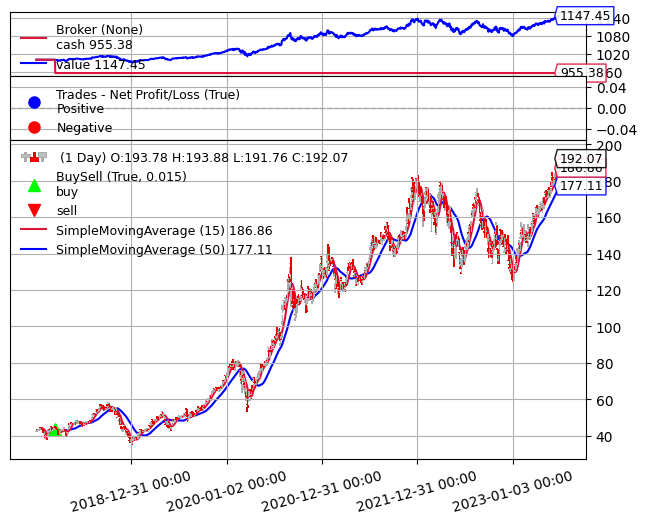

In [14]:
%matplotlib inline
cerebro.plot(style='candlestick', volume=False)[0][0]